# Overfitting and Underfitting
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

## Program for understanding Overfitting and Underfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [3]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

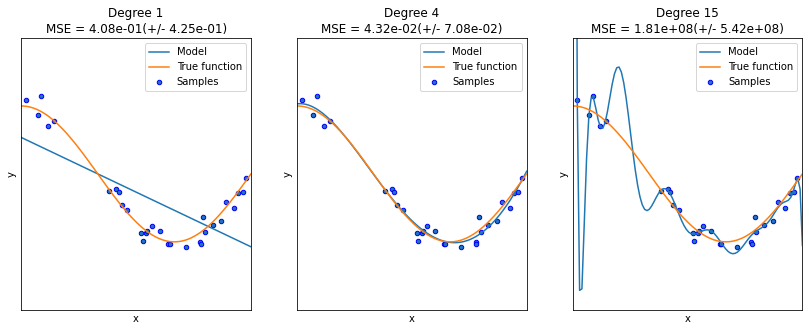

In [4]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Overfitting (Printing accuracy at different steps)
## https://machinelearningmastery.com/overfitting-machine-learning-models/

In [5]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [6]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [7]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [8]:
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]

In [9]:
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.763, test: 0.767
>2, train: 0.804, test: 0.805
>3, train: 0.871, test: 0.868
>4, train: 0.906, test: 0.890
>5, train: 0.924, test: 0.901
>6, train: 0.937, test: 0.912
>7, train: 0.947, test: 0.917
>8, train: 0.956, test: 0.914
>9, train: 0.966, test: 0.917
>10, train: 0.975, test: 0.911
>11, train: 0.981, test: 0.913
>12, train: 0.985, test: 0.909
>13, train: 0.990, test: 0.909
>14, train: 0.993, test: 0.907
>15, train: 0.995, test: 0.905
>16, train: 0.996, test: 0.910
>17, train: 0.997, test: 0.908
>18, train: 0.998, test: 0.904
>19, train: 0.999, test: 0.905
>20, train: 0.999, test: 0.903
>21, train: 1.000, test: 0.902
>22, train: 1.000, test: 0.905
>23, train: 1.000, test: 0.903
>24, train: 1.000, test: 0.901
>25, train: 1.000, test: 0.901
>26, train: 1.000, test: 0.906
>27, train: 1.000, test: 0.905
>28, train: 1.000, test: 0.900
>29, train: 1.000, test: 0.900
>30, train: 1.000, test: 0.908


# -------------------------------------------------------------------------------------------------------------

# Cross-validation

## https://scikit-learn.org/stable/modules/cross_validation.html

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

### Basic method to compute score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)



0.9666666666666667

### Estimate the accuracy by splitting the data, computing the score 5 consecutive times (with different splits each time)



In [12]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [13]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


### Using the different scoring parameter

In [14]:
from sklearn import metrics

scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores



array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

### Specified multiple metrics of predefined scorer names

In [15]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())

scores['test_recall_macro']

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

### Calculate cross validation score by passing a cross validation iterator 

In [16]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)


array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

### Use an iterable yielding (train, test) splits as arrays of indices

In [17]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([1.        , 0.97333333])

## Different type of Cross validation iterators


### K-fold


In [18]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]


### Repeated K-Fold

In [19]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### Leave One Out (LOO)

In [20]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))



[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


# -------------------------------------------------------------------------------------------------------------


# Validation curve

## https://keeeto.github.io/blog/bias_variance/
## https://scikit-learn.org/stable/modules/learning_curve.html

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [22]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_comb = df_train.append(df_test)

X = pd.DataFrame()


In [23]:
def encode_sex(x):
    return 1 if x == 'female' else 0

def family_size(x):
    size = x.SibSp + x.Parch 
    return 4 if size > 3 else size

X['Sex'] = df_comb.Sex.map(encode_sex)
X['Pclass'] = df_comb.Pclass
X['FamilySize'] = df_comb.apply(family_size, axis=1)

In [24]:
fare_median = df_train.groupby(['Sex', 'Pclass']).Fare.median()
fare_median.name = 'FareMedian'

age_mean = df_train.groupby(['Sex', 'Pclass']).Age.mean()
age_mean.name = 'AgeMean'

def join(df, stat):
    return pd.merge(df, stat.to_frame(), left_on=['Sex', 'Pclass'], right_index=True, how='left')

X['Fare'] = df_comb.Fare.fillna(join(df_comb, fare_median).FareMedian)
X['Age'] = df_comb.Age.fillna(join(df_comb, age_mean).AgeMean)

In [25]:
def quantiles(series, num):
    return pd.qcut(series, num, retbins=True)[1]

def discretize(series, bins):
    return pd.cut(series, bins, labels=range(len(bins)-1), include_lowest=True)
    
X['Fare'] = discretize(X.Fare, quantiles(df_comb.Fare, 10))
X['Age'] = discretize(X.Age, quantiles(df_comb.Age, 10))


In [26]:
X_train = X.iloc[:df_train.shape[0]]
X_test = X.iloc[df_train.shape[0]:]

y_train = df_train.Survived

In [27]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 7

In [28]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


In [29]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    

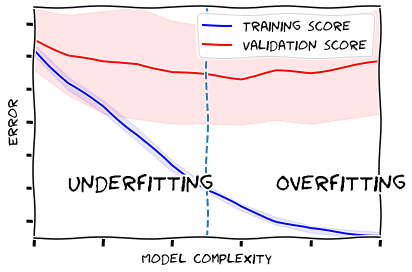

In [30]:
plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(2,13))


# -------------------------------------------------------------------------------------------------------------


# ROC
## https://www.statology.org/plot-roc-curve-python/

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [32]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

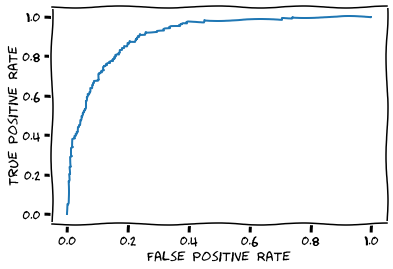

In [33]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Task 1: Perform all of the above codes of Overfitting, Cross Validation, etc. with the help of the given reference link.

# Task 2: Explain your analysis of the code. Make a detailed analysis that can also cover the following questions: (Submit the PDF of Report)

###             1) According to you, why do overfitting and underfitting occur, and how resolve them? What is the difference between them?
###             2) What kind of pattern did you analyze in the Train and Test score while running the code of overfitting?
###             3) What is cross-validation, and what did you analyze in a different type of validation that you performed?
###             4) Explain the analysis from generated ROC and validation curve and what they represent?

# Task 3: Using the given Cross Validation iterators perform all types of Cross Validations we did in the task :
	
###             1) K-fold
###             2) Repeated K-Fold
###             3) Leave One Out (LOO)

## Apart from this three, try to perform validation using three new iterators.

# Task 4: With the help of the given code and references complete all of the following step:
  
###            1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.
###            2) Try to resolve the overfitting.
###            3) Calculate the Validation score by any two or three given techniques and Validation iterators.
###           4) Generate the validation curve 
###           5) Predict the output of testing data.
###           6) Generate the ROC curve using the predicted data and actual data.

	

## TASK 3

In [34]:
# Loading Packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold,RepeatedKFold,LeaveOneOut,ShuffleSplit,StratifiedKFold
from sklearn.model_selection import cross_val_score

# Loading Data
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

#### Model Building

In [35]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initializing model
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)


#### K fold Cross Validation

In [36]:

# Applying Kfold
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with K fold",np.mean(np.absolute(scores)))

Average Accuracy with K fold 0.9550000000000001


#### Repeated K fold Cross Validation

In [37]:
# Applying RepeatedKfold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with Repeated K fold",np.mean(np.absolute(scores)))

Average Accuracy with Repeated K fold 0.9450000000000001


#### Leave One Out Cross Validation

In [38]:
# Applying Leave One out
cv = LeaveOneOut()

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with Leave One out",np.mean(np.absolute(scores)))

Average Accuracy with Leave One out 0.9555555555555556


#### Stratified K Fold

In [39]:
# Applying Leave P out
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with Leave P out",np.mean(np.absolute(scores)))

Average Accuracy with Leave P out 0.9550000000000001


#### ShuffleSplit

In [40]:
# Applying ShuffleSplit
cv =  ShuffleSplit(n_splits=10, random_state=1)

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with ShuffleSplit",np.mean(np.absolute(scores)))

Average Accuracy with ShuffleSplit 0.9400000000000001


## TASK 4

#### 1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.

In [41]:
# Importing Packages
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Importing Code
df_wine = datasets.load_wine()

In [43]:
# print the names of the features
print(df_wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [44]:
# print the label species(class_0, class_1, class_2)
print(df_wine.target_names)

['class_0' 'class_1' 'class_2']


In [45]:
# Dependent feature
print(df_wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [46]:
# print data shape
print(df_wine.data.shape)

(178, 13)


In [47]:

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(df_wine.data, df_wine.target, test_size=0.3) # 70% training and 30% test

In [48]:
# Empty lists for adding train & test accuracy
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]

In [49]:
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.734, test: 0.593
>2, train: 0.944, test: 0.796
>3, train: 0.992, test: 0.852
>4, train: 0.992, test: 0.870
>5, train: 1.000, test: 0.889
>6, train: 1.000, test: 0.833
>7, train: 1.000, test: 0.870
>8, train: 1.000, test: 0.889
>9, train: 1.000, test: 0.833
>10, train: 1.000, test: 0.870
>11, train: 1.000, test: 0.833
>12, train: 1.000, test: 0.870
>13, train: 1.000, test: 0.870
>14, train: 1.000, test: 0.833
>15, train: 1.000, test: 0.870
>16, train: 1.000, test: 0.889
>17, train: 1.000, test: 0.852
>18, train: 1.000, test: 0.852
>19, train: 1.000, test: 0.870
>20, train: 1.000, test: 0.852
>21, train: 1.000, test: 0.870
>22, train: 1.000, test: 0.870
>23, train: 1.000, test: 0.870
>24, train: 1.000, test: 0.870
>25, train: 1.000, test: 0.852
>26, train: 1.000, test: 0.870
>27, train: 1.000, test: 0.852
>28, train: 1.000, test: 0.870
>29, train: 1.000, test: 0.870
>30, train: 1.000, test: 0.870


#### 2) Try to resolve the overfitting.

In [50]:
# Applying Kfold
# I have set max depth = 6 as after that test accuracy falls down
clf = RandomForestClassifier(max_depth=6).fit(X_train,y_train)

cv = StratifiedKFold(n_splits=12, random_state=1, shuffle=True)

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with K fold",np.mean(np.absolute(scores)))

Average Accuracy with K fold 0.9791666666666666


#### 3) Calculate the Validation score by any two or three given techniques and Validation iterators.


















































































































































































































































In [51]:
# Applying ShuffleSplit
cv =  ShuffleSplit(n_splits=10, random_state=1)

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with ShuffleSplit",np.mean(np.absolute(scores)))

Average Accuracy with ShuffleSplit 0.9666666666666668


In [52]:
# Applying Leave One out
cv = LeaveOneOut()

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with Leave One out",np.mean(np.absolute(scores)))

Average Accuracy with Leave One out 0.9814814814814815


In [53]:
# Applying RepeatedKfold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with Repeated K fold",np.mean(np.absolute(scores)))

Average Accuracy with Repeated K fold 0.9688888888888889


In [54]:
# Applying Kfold
cv = KFold(n_splits=6, random_state=1, shuffle=True)

# Applying CV
scores = cross_val_score(clf, X_test, y_test,
                         cv=cv, n_jobs=-1)

print("Average Accuracy with K fold",np.mean(np.absolute(scores)))

Average Accuracy with K fold 0.9629629629629629


#### 4) Generate the validation curve

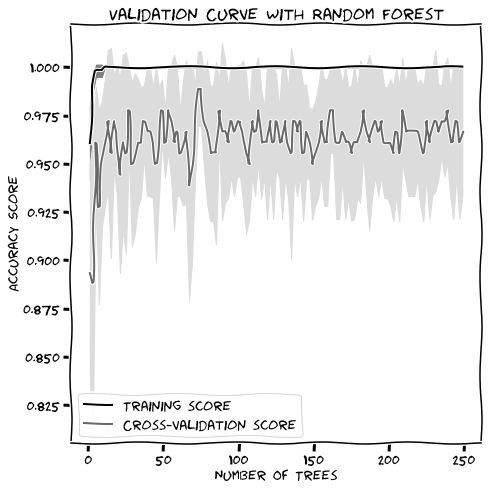

In [55]:
X, y = df_wine.data, df_wine.target

param_range = np.arange(1, 250, 2)

# Calculating accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(),
                              X, y, param_name="n_estimators", param_range=param_range,
                              cv=4, scoring="accuracy", n_jobs=-1)

# Calculating mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculating mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting mean accuracy scores for training and test sets
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plotting accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Creating plot    
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


#### 5) Predict the output of testing data.

In [56]:
# Predicting for test dat
y_pred = clf.predict(X_test)
comp_df = pd.DataFrame()
# Adding predicted and original results of test data in a datframe
comp_df["Original"] = y_test
comp_df["Predicted"] = y_pred
comp_df

,Original,Predicted
0,2,2
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,2,2
7,1,1
8,2,2
9,2,2


### 6) Generate the ROC curve using the predicted data and actual data.

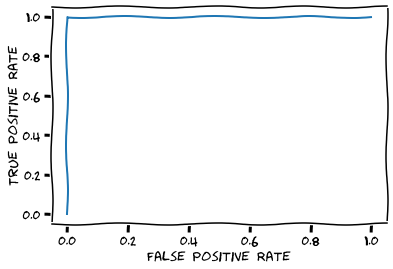

In [57]:
# Finding probability
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label=1)

# creating ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()